# Final Project 
## Author: Tayaba Saleem 

In [3]:
#Libraries 
import os
import re
import tweepy as tw
import pandas as pd
import configparser
from textblob import TextBlob as TxB
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.probability import FreqDist
import numpy as np
# import pycountry
import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [4]:
#twitter connection
def connect_twitter():
        # Read the config file
        config = configparser.ConfigParser()
        config.read('C:/Users/tayab/Documents/IntrotoPython/LabsHomework/Final Project/config.ini')
        # Read the values
        api_key = config['twitter']['API_Key']

        api_key_secret = config['twitter']['API_Key_Secret']

        access_token = config['twitter']['Access_Token']

        access_token_secret = config['twitter']['Access_Token_Secret']

        auth = tw.OAuthHandler(api_key,api_key_secret)
        auth.set_access_token(access_token,access_token_secret)

        api= tw.API(auth)
        return api

In [5]:
#defining all my funtions 
#using regex to clean and formate my tweets 
def format_tweet(tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

#analysis of twittee
def analysis_tweet(clean_string):
        process_data = TxB(clean_string)
        if process_data.sentiment.polarity > 0:
            return 'Positive'
        elif process_data.sentiment.polarity == 0:
            return 'Neutral'
        else:
            return 'Negative'

#finding the tweet on key word or hash
def find_tweet(api,search_key, number_of_tweet):
        data=[]
        tweet_txt_joint=""
        public_tweet=tw.Cursor(api.search_tweets,q=str(search_key),lang="en",tweet_mode="extended").items(number_of_tweet)
        
        for tweet in public_tweet:
                tweet_txt = tweet.full_text
                tweet_time= tweet.created_at
                tweet_author=tweet.author.screen_name
                tweet_location=tweet.user.location
                tweet_location = format_tweet(tweet_location)
                process_date = (str(tweet_time)[:10])
                
                # clean the twittees
                clean_string= format_tweet(tweet_txt)
                #sentimate analysis of tweet
                sentimate_value = analysis_tweet(clean_string)
                tweet_txt_joint = tweet_txt_joint+(str(clean_string))

                data.append([tweet_txt,tweet_author,tweet_location,sentimate_value,process_date])
        df = pd.DataFrame(data)
        return df,tweet_txt_joint
    
#removing the stop words so the visuals and word could make sense 
def RemoveNormalWords(full_string):
        slected_list = ['The', 'the', 'a' ,'A', 
                        'IS' ,'is', 'and', 'to', 
                        'of','s','for','with',
                        'in','from','are','on','was',
                        'your','that','this','you','by',
                        'so','their','at','he','she',
                        's','I','it','t','by','be',
                        'as','an','has','have',
                        'our','will','de','they', 'his', 'but', 'did', 'take', 'try', 'not', 'about', 
                       'one','all', 'see', 'get', 'if', 'now', 'me', 'being', 'its', 'what', 'know', 
                       'can', 'hey', 'some', 'amp', 'we', 'or', 'my', 'out', 'up', 'DeFi', '1', 'do']
        statement = full_string
        database_1 = sorted(list(slected_list), key=len)
        pattern = re.compile(r"\b(" + "|".join(database_1) + ")\\W", re.I)
        return pattern.sub("", full_string + ' ')[:-1] 
    
#Measuring the % for pie charts 
def make_autopct(values):
                def my_autopct(pct):
                        total = sum(values)
                        val = int(round(pct*total/100.0))
                        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
                return my_autopct

#sentiment pie chart
def pie_chart(Positive_count,Neutral_count,Negative_count):
                count_sentimate = np.array([Positive_count,Neutral_count,Negative_count])
                plot_sentimate = ["Positive", "Neutral", "Negative"]
                colors = ['#1E8449', '#F1C40F', '#E74C3C']
                plt.pie(count_sentimate, labels = plot_sentimate,autopct=make_autopct(count_sentimate), colors = colors)
                plt.show() 
                
#counting the sentiments 
def Count_sentimates(datafm):
                z={}
                z= (datafm).value_counts(dropna=False)
                Positive_count= z.get('Positive')
                Negative_count= z.get('Negative')
                Neutral_count= z.get('Neutral')

                if(Positive_count== None):
                        Positive_count=0
                if(Negative_count == None):
                        Negative_count=0
                if(Neutral_count == None):
                        Neutral_count=0
                return Positive_count, Negative_count, Neutral_count
            
#word colud 
def word_cloud(datafm):
        comment_words = ''
        stopwords = set(STOPWORDS)
        for val in datafm:
                val = str(val)
                tokens = val.split()
                for i in range(len(tokens)):
                        tokens[i] = tokens[i].lower()
                        comment_words += " ".join(tokens)+" "
        word_cloud_var = WordCloud(width = 800, height = 800,
        background_color ='white',
        stopwords = stopwords,
        min_font_size = 10).generate(comment_words)
        return word_cloud_var

def word_cloud_str(split_tweet_txt):
        comment_words = ''
        stopwords = set(STOPWORDS)
        # Converts each token into lowercase
        for i in range(len(split_tweet_txt)):
                split_tweet_txt[i] = split_tweet_txt[i].lower()
                comment_words += " ".join(split_tweet_txt)+" "

        word_cloud_var = WordCloud(width = 800, height = 800,
        background_color ='white',
        stopwords = stopwords,
        min_font_size = 10).generate(comment_words)
        return word_cloud_var

def plot_word_cloud(word_cloud_var):
        # plot the WordCloud image                      
        plt.figure(figsize = (8, 8), facecolor = None)
        plt.imshow(word_cloud_var)
        plt.axis("off")
        plt.tight_layout(pad = 0)
        plt.show()
        exit

In [6]:
#pulling 500 tweets for Jpmorgan or @jpmorgan
api = connect_twitter()
serach_string = "jpmorgan @jpmorgan"
number_of_tweet = 200
        
df,tweet_txt_joint = find_tweet(api,serach_string,number_of_tweet)             
df.rename(columns = {0:'tweet',1:'tweet_author',2:'tweet_location',3:'sentimate',4:'tweet_time'}, inplace = True)
print(df)
#print the tweet in a single string and is used for word cloud 
# print(tweet_txt_joint)

                                                 tweet    tweet_author  \
0    RT @iamwesmoore: I was proud to join Maryland ...       WOODY8411   
1    RT @WorkingMoneyCH: (1/2)\nSo #JamieDimon has ...         xrp4me2   
2    RT @RealPro4Real: ‘This is crypto extinction’:...    RealPro4Real   
3    ‘This is crypto extinction’: Peter Schiff pred...    RealPro4Real   
4    @RobetJosef @iamwesmoore @jpmorgan @Chase @May...     SoundMoneyG   
..                                                 ...             ...   
195  What in the world has happened to Jamie Dimon,...     shannon4412   
196  🎬 Tomorrow! Join our next #LinkedInLive w/ spe...  consciouslyunb   
197  RT @AmericaNewsroom: TODAY: @jpmorgan CEO, Jam...       RTR174724   
198  RT @OMFIF: @OMFIFDMI will host an esteemed pan...        OMFIFDMI   
199  @OMFIFDMI will host an esteemed panel of exper...           OMFIF   

                tweet_location sentimate  tweet_time  
0                               Positive  2022-12-08  
1

In [7]:
#number tweet that have a location
df['tweet_location'].value_counts()

                   191
NoWhere Land FL     10
United States       10
India                7
Los Angeles CA       7
                  ... 
Colorado             1
Atlanta GA           1
DeFi                 1
Antochia             1
Global               1
Name: tweet_location, Length: 207, dtype: int64

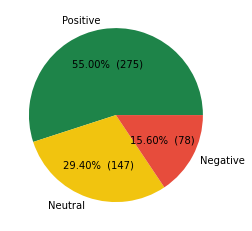

In [6]:
#sentimate value ploted into a pie chart 
Positive_count, Negative_count, Neutral_count = Count_sentimates(df['sentimate'])
pie_chart(Positive_count,Neutral_count,Negative_count)

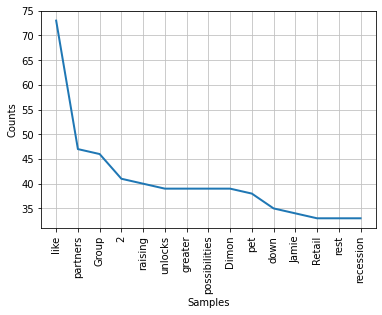

In [7]:
#visual to count the occurance of word
Nos= 15
full_string = tweet_txt_joint    
tweet_txt_joint=str(RemoveNormalWords(full_string))     
split_tweet_txt = tweet_txt_joint.split()      
txt_counters = Counter(split_tweet_txt)      
KeyWords = txt_counters.most_common(Nos)
fdist = FreqDist(txt_counters)
fdist.plot(Nos,cumulative=False)
plt.show()

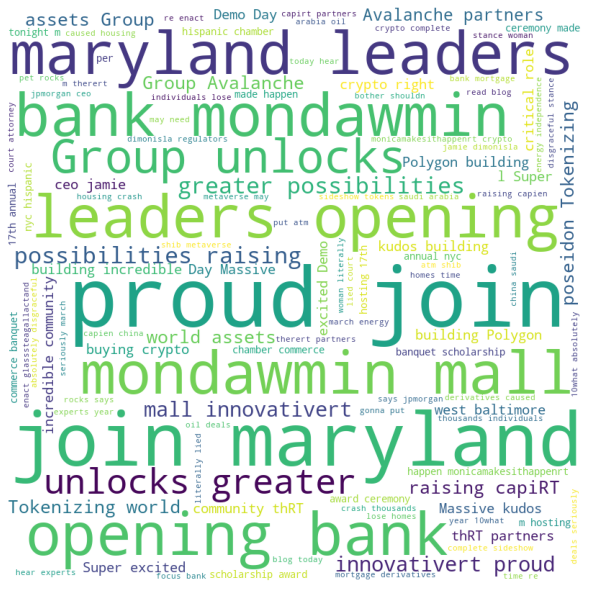

In [8]:
#analyzing the first 500 words and developing word cloud 
split_tweet_txt_new = split_tweet_txt[0:500]
word_cloud_var = word_cloud_str(split_tweet_txt_new)
plot_word_cloud(word_cloud_var)

In [7]:
#this is developing the dictionary where location is the key and data is the tweet and sentiments.
loc_data_dict={}
date_data = {}
for date_value in df['tweet_time']:
    if(str(date_value) != 0 or None):
        tweet_per_date=df.loc[df['tweet_time']== str(date_value),['tweet','sentimate']]
        date_data.update({date_value:tweet_per_date})
for Location in df['tweet_location']:
        tweet_per_loc=df.loc[df['tweet_location']== str(Location),['tweet','sentimate']]
        loc_data_dict.update({Location:tweet_per_loc})

#### This is the interactive part of the program, where user can select a certian locaiton and it will display the tweets for the specific place with each tweet sentiment and along with a aggregated sentiment result as a pie chart and a word cloud visuals. 
#### The reason i am display the locaiton as list is becuase a user on twitter can define their location to be out of world they can even choose "moon" or "playground" as a location as well. so i am lisitng all the possible locations that were given by the twitters(people who are tweeting) on their tweets.


location:
dict_keys(['', 'CNMI AZ UK Germany Palau', 'Las Vegas Nevada', 'Machine Dominated MoCo MD', '459 West 59th ST NYC', 'Port St Lucie FL', 'Hong Kong', 'New York City', 'Canada', 'Seattle WA', 'Philippines', 'India', 'North East United States', 'The Globe', 'Web 3 0', 'Washington DC', 'Rockville Maryland', 'GeeksResist HQ', 'Maryland', 'Wheaton MD', 'Baltimore', 'Chicago Cook County IL', 'hobi s left earlobe', '20 blk', 'D C U S A', 'Glocal SoFL', 'Anaheim CA', 'in', 'The Avalanche', 'Indonesia', 'Rum Cay Island', 'Miami FL', 'StocksLand', 'South Bay Los Angeles', 'Pittsburgh PA', 'Lagos Nigeria', 'Kingdom of Israel', 'United States', 'Viet Nam', 'England United Kingdom', 'Space', 'World', 'Satan s taint aka Wall St', 'NYC', 'Avalanche', 'Boston MA', 'New Jerusalem', 'Toronto Ontario', 'Mercury Venus', 'Los Angeles CA', 'Everywhere', 'Ankara T rkiye', 'Antochia', 'Tkaronto', 'Montgomery Texas', 'N poles Benito Ju rez', 'Seattle everywhere', 'Utah', 'SAITAMA INU', 'Tristate Area 

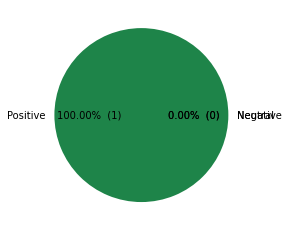

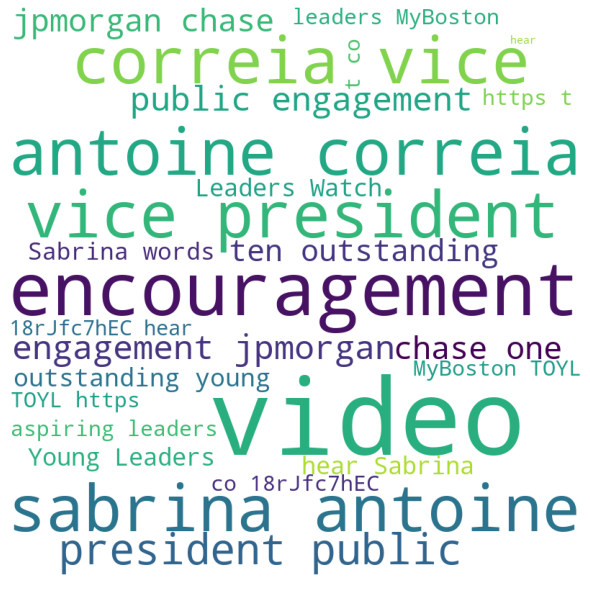

Type Y to continue or N to endY
location:
dict_keys(['', 'CNMI AZ UK Germany Palau', 'Las Vegas Nevada', 'Machine Dominated MoCo MD', '459 West 59th ST NYC', 'Port St Lucie FL', 'Hong Kong', 'New York City', 'Canada', 'Seattle WA', 'Philippines', 'India', 'North East United States', 'The Globe', 'Web 3 0', 'Washington DC', 'Rockville Maryland', 'GeeksResist HQ', 'Maryland', 'Wheaton MD', 'Baltimore', 'Chicago Cook County IL', 'hobi s left earlobe', '20 blk', 'D C U S A', 'Glocal SoFL', 'Anaheim CA', 'in', 'The Avalanche', 'Indonesia', 'Rum Cay Island', 'Miami FL', 'StocksLand', 'South Bay Los Angeles', 'Pittsburgh PA', 'Lagos Nigeria', 'Kingdom of Israel', 'United States', 'Viet Nam', 'England United Kingdom', 'Space', 'World', 'Satan s taint aka Wall St', 'NYC', 'Avalanche', 'Boston MA', 'New Jerusalem', 'Toronto Ontario', 'Mercury Venus', 'Los Angeles CA', 'Everywhere', 'Ankara T rkiye', 'Antochia', 'Tkaronto', 'Montgomery Texas', 'N poles Benito Ju rez', 'Seattle everywhere', 'Utah'

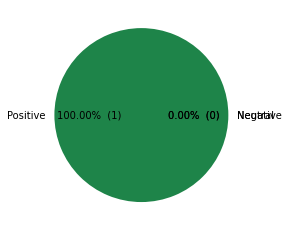

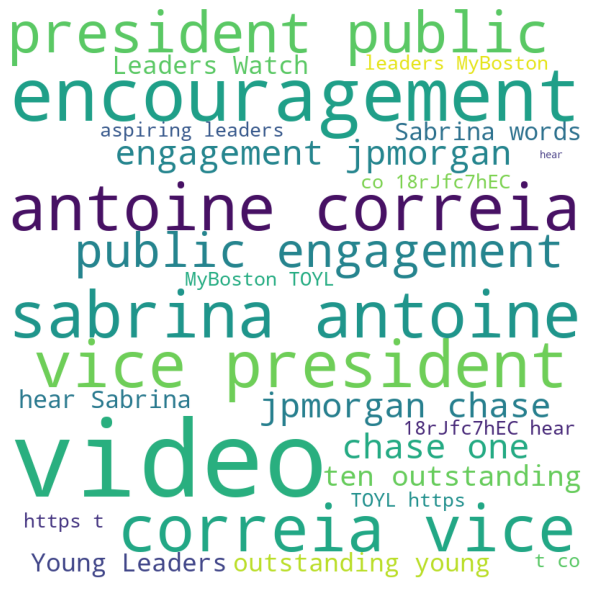

Type Y to continue or N to endy
location:
dict_keys(['', 'CNMI AZ UK Germany Palau', 'Las Vegas Nevada', 'Machine Dominated MoCo MD', '459 West 59th ST NYC', 'Port St Lucie FL', 'Hong Kong', 'New York City', 'Canada', 'Seattle WA', 'Philippines', 'India', 'North East United States', 'The Globe', 'Web 3 0', 'Washington DC', 'Rockville Maryland', 'GeeksResist HQ', 'Maryland', 'Wheaton MD', 'Baltimore', 'Chicago Cook County IL', 'hobi s left earlobe', '20 blk', 'D C U S A', 'Glocal SoFL', 'Anaheim CA', 'in', 'The Avalanche', 'Indonesia', 'Rum Cay Island', 'Miami FL', 'StocksLand', 'South Bay Los Angeles', 'Pittsburgh PA', 'Lagos Nigeria', 'Kingdom of Israel', 'United States', 'Viet Nam', 'England United Kingdom', 'Space', 'World', 'Satan s taint aka Wall St', 'NYC', 'Avalanche', 'Boston MA', 'New Jerusalem', 'Toronto Ontario', 'Mercury Venus', 'Los Angeles CA', 'Everywhere', 'Ankara T rkiye', 'Antochia', 'Tkaronto', 'Montgomery Texas', 'N poles Benito Ju rez', 'Seattle everywhere', 'Utah'

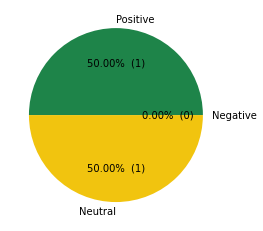

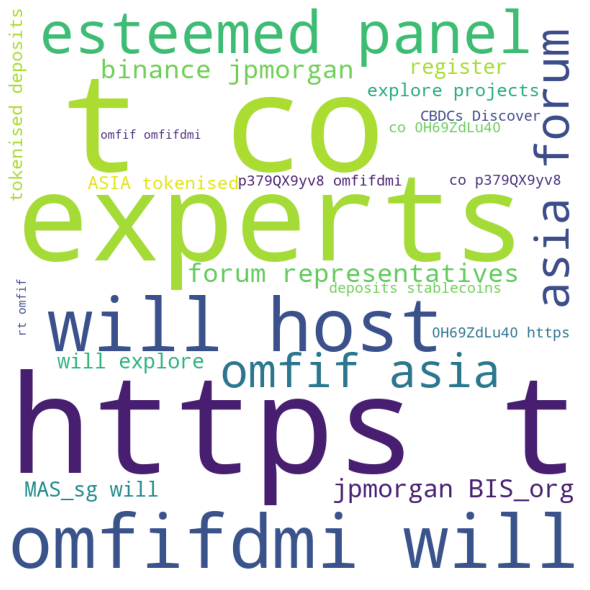

Type Y to continue or N to endN
Analysis Ended


In [12]:
x='Y'              
while(x == 'Y'):
    print("location:")
    print(loc_data_dict.keys())
    try:
        select_loc = input('Select Location from Above:')
        Tweets_loc = loc_data_dict.get(select_loc)
        df_1 = pd.DataFrame(Tweets_loc)
        print(Tweets_loc)
        Positive_count, Negative_count, Neutral_count = Count_sentimates(df_1['sentimate'])
        pie_chart(Positive_count, Neutral_count, Negative_count)
        word_cloud_var = word_cloud(df_1['tweet'])
        plot_word_cloud(word_cloud_var)

        if(len(Location) != 0 or None):
            tweet_per_loc=df.loc[df['tweet_location']== str(Location),['tweet','sentimate','tweet_time']]
            loc_data_dict.update({Location:tweet_per_loc})
    except:
        print("Date not found in the list, please type the date from the list")
    x = str.upper((input("Type Y to continue or N to end")))
    if(x == 'N' or x == 'n'):
        print("Analysis Ended")
        break
    else:
        continue

#### This is the interactive part of the program, where user can select a certian locaiton and it will display the tweetsfor the specific place with each tweet sentiment and along with a aggregated sentiment result as a pie chart and a word cloud visuals. 
#### since i am only pulling 200 tweet it only give the list of "date" that i have tweet for

Date:
dict_keys(['2022-12-08', '2022-12-07'])
Select the date from the list, Parse Date in (YYYY-MM-DD) Format:2022-12-07
                                                 tweet sentimate
59   @jpmorgan @Chase Career Readiness Mentoring Pr...  Positive
60   RT @loobah_l: Super excited about the @Techsta...  Positive
61   Super excited about the @TechstarsMIA Demo Day...  Positive
62   @serenawilliams @jpmorgan @money2020 GoodMorni...  Positive
63   RT @DiMartinoBooth: Retail giving a new meanin...  Negative
..                                                 ...       ...
195  What in the world has happened to Jamie Dimon,...  Positive
196  🎬 Tomorrow! Join our next #LinkedInLive w/ spe...  Positive
197  RT @AmericaNewsroom: TODAY: @jpmorgan CEO, Jam...  Positive
198  RT @OMFIF: @OMFIFDMI will host an esteemed pan...   Neutral
199  @OMFIFDMI will host an esteemed panel of exper...  Positive

[141 rows x 2 columns]


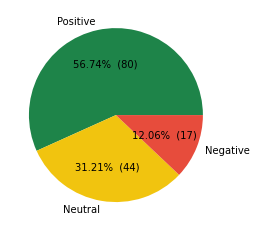

Type Y to continue or N to endy
Date:
dict_keys(['2022-12-08', '2022-12-07'])
Select the date from the list, Parse Date in (YYYY-MM-DD) Format:2022-12-07
                                                 tweet sentimate
59   @jpmorgan @Chase Career Readiness Mentoring Pr...  Positive
60   RT @loobah_l: Super excited about the @Techsta...  Positive
61   Super excited about the @TechstarsMIA Demo Day...  Positive
62   @serenawilliams @jpmorgan @money2020 GoodMorni...  Positive
63   RT @DiMartinoBooth: Retail giving a new meanin...  Negative
..                                                 ...       ...
195  What in the world has happened to Jamie Dimon,...  Positive
196  🎬 Tomorrow! Join our next #LinkedInLive w/ spe...  Positive
197  RT @AmericaNewsroom: TODAY: @jpmorgan CEO, Jam...  Positive
198  RT @OMFIF: @OMFIFDMI will host an esteemed pan...   Neutral
199  @OMFIFDMI will host an esteemed panel of exper...  Positive

[141 rows x 2 columns]


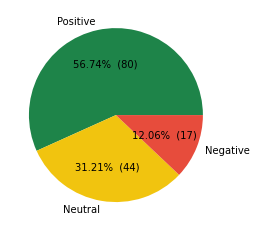

Type Y to continue or N to endn
Analysis Ended


In [13]:
x= 'Y'               
while(x == 'Y'):
    print("Date:")
    print(date_data.keys())
    try:
        select_date = input('Select the date from the list, Parse Date in (YYYY-MM-DD) Format:')
        Tweets_date= date_data.get(select_date)
        print(Tweets_date)
        df_1 = pd.DataFrame(Tweets_date)
        Positive_count, Negative_count, Neutral_count = Count_sentimates(df_1['sentimate'])
        pie_chart(Positive_count,Neutral_count,Negative_count)
    except: 
        print("Date not found in the list, please type the date from the list")
    x = str.upper((input("Type Y to continue or N to end")))
    if(x == 'N' or x == 'n'):
        print("Analysis Ended")
        break
    else:
        continue

[{'2022-12-08': [{'P': 38}, {'Ne': 7}, {'Nu': 14}]}, {'2022-12-07': [{'P': 80}, {'Ne': 17}, {'Nu': 44}]}]


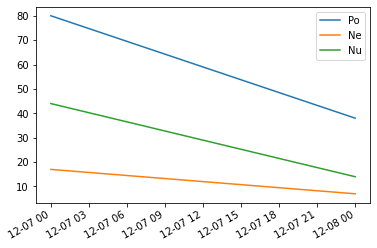

In [14]:
x_p= {}
x_ne={}
x_nu={}
x_date={}
date_list=[]
for dates in date_data.keys():
    Tweets_date= date_data.get(dates)
    df_1 = pd.DataFrame(Tweets_date)
    Positive_count, Negative_count, Neutral_count = Count_sentimates(df_1['sentimate']) 
    x_p={"P":Positive_count}
    x_ne={"Ne":Negative_count}
    x_nu={"Nu":Neutral_count}
    date_list.append({dates:[x_p, x_ne, x_nu]})
print(date_list)
date_time=[]
posetive_value=[]
negative_value=[]
neutral_value=[]
for dict_s in date_list:
    for k, v in dict_s.items():
        date_time.append(k)
        posetive_value.append(v[0].get('P'))
        negative_value.append(v[1].get('Ne'))
        neutral_value.append(v[2].get('Nu'))
date_time = pd.to_datetime(date_time)
DF = pd.DataFrame()
DF['Po'],DF['Ne'],DF['Nu'] = posetive_value,negative_value,neutral_value
DF = DF.set_index(date_time)
plt.plot(DF,label=['Po','Ne','Nu'])
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()